# Análisis Exploratorio

**Objetivo:** Explorar el dataset limpio y extraer conclusiones estadísticas básicas.

## Análisis exploratorio: Popularidad vs. Puntuación

En esta sección se carga el archivo limpio `popularidad_vs_puntuacion.csv` y se realiza un análisis exploratorio básico para responder a la pregunta:

**¿Qué relación existe entre la popularidad y la puntuación de un videojuego?**

Se realiza:
- Un resumen estadístico de las columnas `added` y `rating`.
- La visualización de casos extremos (más populares y mejor puntuados).
- El cálculo del coeficiente de correlación de Pearson entre `added` y `rating`, para cuantificar la relación entre ambas variables.

También se revisa la columna `metacritic` para observar posibles diferencias entre la percepción del público y la crítica especializada.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual para los gráficos
sns.set_style("whitegrid")
sns.set_palette("deep")

In [4]:
# Cargamos los datos de popularidad y puntuación filtrados
df = pd.read_json("../data/processed/popularidad_vs_puntuacion.json")
df.head()


,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6896,21662,2015-05-18,92.0,True,True,True,4.65,21662
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3352,14082,2015-11-09,84.0,True,True,True,3.81,14082
3,Rocket League,3.93,2822,12769,2015-07-07,86.0,True,True,True,3.93,12769
4,Rise of the Tomb Raider,4.04,2741,12212,2015-11-10,86.0,True,True,True,4.04,12212


## Estadísticas descriptivas

A continuación se muestra un resumen estadístico de las variables limpias `added_clean`, `rating_clean` y `metacritic`.


In [7]:
# Datos estadísticos de las columnas "added_clean", "rating_clean" y "metacritic"
df[["added_clean", "rating_clean", "metacritic"]].describe()

,added_clean,rating_clean,metacritic
count,2000.000000,2000.000000,1056.000000
mean,1953.703500,3.401180,76.918561
std,2181.671936,0.895355,8.416920
min,63.000000,0.000000,30.000000
25%,606.000000,3.090000,72.750000
50%,1313.500000,3.590000,78.000000
75%,2313.250000,3.980000,82.000000
max,21662.000000,4.790000,97.000000


In [8]:
# Filtramos los datos con valores válidos
df = df[(df["rating_clean"] != -1) & (df["added_clean"] != -1)]
df

,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6896,21662,2015-05-18,92.0,True,True,True,4.65,21662
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3352,14082,2015-11-09,84.0,True,True,True,3.81,14082
3,Rocket League,3.93,2822,12769,2015-07-07,86.0,True,True,True,3.93,12769
4,Rise of the Tomb Raider,4.04,2741,12212,2015-11-10,86.0,True,True,True,4.04,12212
...,...,...,...,...,...,...,...,...,...,...,...
1995,Dark Hours: Prologue,0.00,0,67,2024-07-18,NaN,True,True,False,0.00,67
1996,Age of Water: The First Voyage,0.00,2,66,2024-03-21,NaN,True,True,False,0.00,66
1997,Legacy of Kain™ Soul Reaver 1&2 Remastered,0.00,5,66,2024-12-10,NaN,True,True,False,0.00,66
1998,SOUTH PARK: SNOW DAY!,2.36,10,65,2024-03-25,NaN,True,True,False,2.36,65


In [9]:
# Filtramos los datos con valores válidos
df = df[(df["rating_clean"] != -1) & (df["added_clean"] != -1)]
df

,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6896,21662,2015-05-18,92.0,True,True,True,4.65,21662
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3352,14082,2015-11-09,84.0,True,True,True,3.81,14082
3,Rocket League,3.93,2822,12769,2015-07-07,86.0,True,True,True,3.93,12769
4,Rise of the Tomb Raider,4.04,2741,12212,2015-11-10,86.0,True,True,True,4.04,12212
...,...,...,...,...,...,...,...,...,...,...,...
1995,Dark Hours: Prologue,0.00,0,67,2024-07-18,NaN,True,True,False,0.00,67
1996,Age of Water: The First Voyage,0.00,2,66,2024-03-21,NaN,True,True,False,0.00,66
1997,Legacy of Kain™ Soul Reaver 1&2 Remastered,0.00,5,66,2024-12-10,NaN,True,True,False,0.00,66
1998,SOUTH PARK: SNOW DAY!,2.36,10,65,2024-03-25,NaN,True,True,False,2.36,65


## Casos extremos

Se muestran los videojuegos más populares y los mejor puntuados según las columnas tratadas.


In [10]:
# Top 10 más Populares
df.sort_values(by="added_clean", ascending=False).head(10)[["name", "added_clean", "rating_clean"]]

,name,added_clean,rating_clean
0,The Witcher 3: Wild Hunt,21662,4.65
600,Red Dead Redemption 2,16334,4.59
1,Life is Strange,15758,4.12
400,Destiny 2,14519,3.52
601,God of War (2018),14145,4.55
2,Fallout 4,14082,3.81
200,DOOM (2016),13861,4.38
1000,Cyberpunk 2077,13552,4.21
3,Rocket League,12769,3.93
401,Horizon Zero Dawn,12655,4.28


In [11]:
# Top 10 mejor puntuados
df.sort_values(by="rating_clean", ascending=False).head(10)[["name", "rating_clean", "added_clean"]]


,name,rating_clean,added_clean
377,The Witcher 3 Wild Hunt - Complete Edition,4.79,1406
1924,DRAGON BALL: Sparking! ZERO,4.75,109
1025,Persona 5 Royal,4.75,3076
1619,Cyberpunk 2077: Phantom Liberty,4.71,1032
1427,The Last of Us Part I,4.67,1660
0,The Witcher 3: Wild Hunt,4.65,21662
1223,Disco Elysium: Final Cut,4.65,2077
1604,Resident Evil 4,4.63,1982
1850,Elden Ring: Shadow of the Erdtree,4.62,284
1883,The Last of Us Part II Remastered,4.61,204


## Correlación entre Popularidad y Puntuación

Se calcula la correlación de Pearson entre las variables `added_clean` y `rating_clean`.


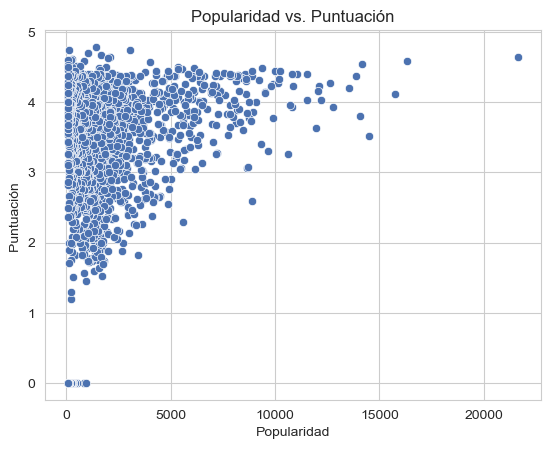

,added_clean,rating_clean
added_clean,1.000000,0.254801
rating_clean,0.254801,1.000000


In [12]:
# Visualización
sns.scatterplot(data=df, x="added_clean", y="rating_clean")
plt.title("Popularidad vs. Puntuación")
plt.xlabel("Popularidad")
plt.ylabel("Puntuación ")
plt.show()

# Correlación entre "added_clean" y "rating_clean"
df[["added_clean", "rating_clean"]].corr(method="pearson")

### Nota sobre la correlación

Aunque se observe cierta correlación entre la popularidad (`added_clean`) y la puntuación (`rating_clean`), **esto no implica causalidad**. La popularidad de un juego puede estar influida por muchos factores externos como campañas de marketing, franquicias conocidas o disponibilidad multiplataforma.

## Comparación con Metacritic

Se analiza la relación entre la puntuación de RAWG (`rating_clean`) y la puntuación de Metacritic.


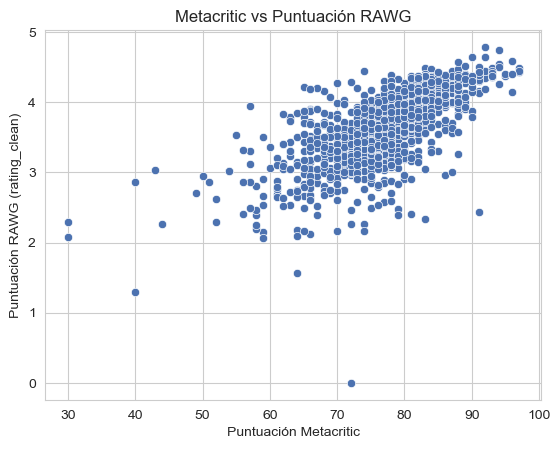

,rating_clean,metacritic
rating_clean,1.00000,0.68169
metacritic,0.68169,1.00000


In [13]:
# Visualización de la correlación entre rating_clean y metacritic
sns.scatterplot(data=df, x="metacritic", y="rating_clean")
plt.title("Metacritic vs Puntuación RAWG")
plt.xlabel("Puntuación Metacritic")
plt.ylabel("Puntuación RAWG (rating_clean)")
plt.show()

# Correlación adicional
df[["rating_clean", "metacritic"]].corr()

### Nota sobre la correlación

La gráfica muestra una relación positiva entre la puntuación otorgada por los usuarios de RAWG (`rating_clean`) y la puntuación de la crítica especializada (`metacritic`). Esto indica que, en general, los juegos mejor valorados por la crítica tienden también a recibir buenas puntuaciones por parte de los usuarios.

## Distribución de Puntuaciones

La distribución de puntuaciones `rating_clean` se concentra mayoritariamente entre 3 y 4 (teniendo en cuenta la distorción que han podido causar los NaN tratados), mostrando una tendencia a **evitar las valoraciones extremas**. Esta acumulación en el rango medio-alto puede reflejar una cierta **moderación en las valoraciones** por parte de los usuarios, o una predominancia de títulos de calidad aceptable en la base de datos.

Con la curva KDE vemos la forma de la distribución, que **se aproxima a una curva normal asimétrica hacia la izquierda**, con una cola que incluye juegos con valoraciones cercanas a 0.

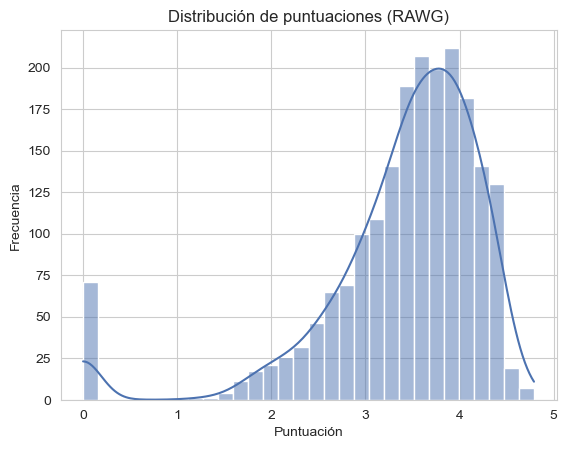

In [14]:

# Visualización de la distribución de puntuaciones
sns.histplot(df["rating_clean"], bins=30, kde=True)
plt.title("Distribución de puntuaciones (RAWG)")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.show()


In [15]:
df[["rating_clean"]]

,rating_clean
0,4.65
1,4.12
2,3.81
3,3.93
4,4.04
...,...
1995,0.00
1996,0.00
1997,0.00
1998,2.36


## Distribución de Puntuaciones (Metacritic)

En esta gráfica vemos cómo se distribuyen las puntuaciones de los juegos según la crítica profesional (Metacritic). La mayoría de las valoraciones están entre **70 y 80 puntos**, formando una curva bastante simétrica, lo que sugiere que la crítica suele dar notas **medias-altas** y no se va mucho a los extremos.

Si comparamos esto con la gráfica de puntuaciones de usuarios (`rating_clean` de RAWG), se nota una diferencia importante. Las valoraciones de los usuarios se concentran más entre **3 y 4 puntos**, con una forma más irregular y una cola hacia la izquierda (hacia el 0), probablemente porque tambien se valoran como 0 en los datos de la API la falta de datos, porque hay juegos poco conocidos o mal valorados.

En resumen:
- **Los críticos** tienden a ser más "formales" y mantienen un rango estrecho de puntuaciones.
- **Los usuarios**, en cambio, son más variados en sus opiniones y no tienen problema en dar puntuaciones muy bajas si algo no les gusta.

Esta comparación viene genial para entender cómo varían las valoraciones según quién las dé, y cómo ambas perspectivas se complementan para tener una visión más completa de la calidad de los juegos.


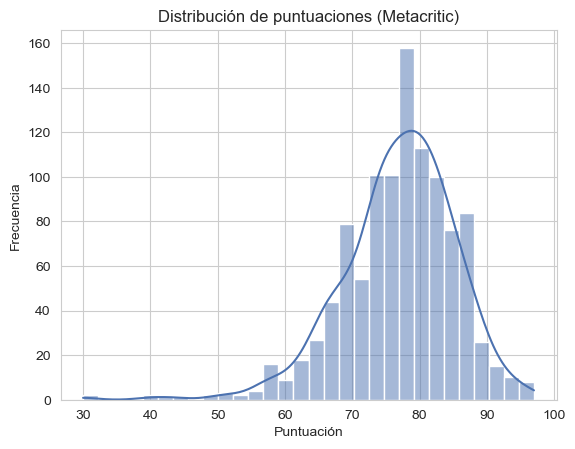

In [5]:

# Visualización de la distribución de puntuaciones Metacritic
sns.histplot(df["metacritic"], bins=30, kde=True)
plt.title("Distribución de puntuaciones (Metacritic)")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.show()


In [6]:
df[["metacritic"]]

,metacritic
0,92.0
1,83.0
2,84.0
3,86.0
4,86.0
...,...
1995,NaN
1996,NaN
1997,NaN
1998,NaN


### Alta puntuación pero baja popularidad
Estos juegos tienen una puntuación excelente (`rating_clean` > 4.5) pero un número de añadidos (`added_clean`) muy bajo (menos de 100). Esto puede indicar **joyas ocultas** que han pasado desapercibidas para el gran público.


In [16]:

# Juegos con buena puntuación pero baja popularidad
df.sort_values(by="rating_clean", ascending=False).query("added_clean < 100")[["name", "rating_clean", "added_clean","metacritic"]].head(3)


,name,rating_clean,added_clean,metacritic
1968,Unicorn Overlord,4.53,83,NaN
1980,Felvidek,4.50,72,NaN
1958,Crow Country,4.46,88,NaN


### Alta popularidad pero baja puntuación
Estos juegos han sido muy añadidos por los usuarios (`added_clean` > 2500) pero tienen puntuaciones bastante bajas (`rating_clean` < 2). En estos casos, la popularidad puede estar influida por la curiosidad, la polémica o el marketing, pero **la calidad percibida no cumple las expectativas**.

In [17]:

# Juegos con mucha popularidad pero baja puntuación
df.sort_values(by="added_clean", ascending=False).query("rating_clean < 2")[["name", "rating_clean", "added_clean","metacritic"]].head(3)


,name,rating_clean,added_clean,metacritic
640,Headsnatchers,1.83,3422,NaN
293,Pixel Puzzles Ultimate,1.99,2722,NaN
80,GameGuru,1.88,2676,NaN


## Conclusión Final: Popularidad vs Puntuación

Este análisis ha permitido profundizar en la relación entre la **popularidad** y la **puntuación** de los videojuegos, utilizando tanto valoraciones de usuarios (RAWG) como de crítica profesional (Metacritic).

- En general, se observa una **correlación positiva** entre la popularidad y la puntuación: los juegos más valorados tienden a tener mayor visibilidad y número de añadidos por parte de los usuarios. No obstante, esta relación no es estrictamente lineal, y existen excepciones notables —juegos muy populares con puntuaciones medias y viceversa— lo que indica que otros factores como el marketing, la comunidad o el tipo de juego también juegan un papel importante.

- Las puntuaciones de usuarios (`rating_clean`) presentan una distribución sesgada con una gran cantidad de ceros. Este comportamiento **no representa necesariamente valoraciones negativas**, sino que puede estar influido por el funcionamiento de la API de RAWG, que puede que de un valor de **0 a juegos sin rating disponible**. Este aspecto puede distorsionar los análisis si no se trata adecuadamente y debe considerarse como un posible **sesgo en los datos**.

- Por otro lado, las puntuaciones de la crítica (`metacritic`) están más concentradas en valores medios-altos, mostrando una distribución más normal y estable. Esto sugiere que la crítica profesional tiende a valorar los juegos dentro de un rango más limitado y consistente.

**Conclusión clave:** Aunque existe una relación general entre popularidad y puntuación, **la forma en que se mide la puntuación (usuarios vs crítica) y el tratamiento de los datos nulos o ausentes tienen impacto en la interpretación**.